#Ejemplo con el dataset MNIST

- Librerías necesarias

In [0]:
%tensorflow_version 1.x
import numpy as np
from keras.datasets import mnist
%matplotlib inline

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import math

In [0]:
import cv2

In [0]:
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

In [0]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

- Preparando los datos

In [0]:
(imagenes_entrenamiento,etiquetas_entrenamiento),(imagenes_test,etiquetas_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
len(imagenes_entrenamiento),len(imagenes_test)

(60000, 10000)

- Total de imágenes: 70000

- Conjunto de **entrenamiento**: 60000 (85.7 %)

- Conjunto de **test**: 10000 (14.3 %)

- Creamos 10 listas donde guardamos las fotos con cada número:

In [0]:
cero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve = [],[],[],[],[],[],[],[],[],[]
n1,n2 = len(imagenes_entrenamiento),len(imagenes_test)
for i in range(0,n1):
  if etiquetas_entrenamiento[i] == 0:
    cero.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 1:
    uno.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 2:
    dos.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 3:
    tres.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 4:
    cuatro.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 5:
    cinco.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 6:
    seis.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 7:
    siete.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 8:
    ocho.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 9:
    nueve.append(imagenes_entrenamiento[i])
for i in range(0,n2):
  if etiquetas_test[i] == 0:
    cero.append(imagenes_test[i])
  elif etiquetas_test[i] == 1:
    uno.append(imagenes_test[i])
  elif etiquetas_test[i] == 2:
    dos.append(imagenes_test[i])
  elif etiquetas_test[i] == 3:
    tres.append(imagenes_test[i])
  elif etiquetas_test[i] == 4:
    cuatro.append(imagenes_test[i])
  elif etiquetas_test[i] == 5:
    cinco.append(imagenes_test[i])
  elif etiquetas_test[i] == 6:
    seis.append(imagenes_test[i])
  elif etiquetas_test[i] == 7:
    siete.append(imagenes_test[i])
  elif etiquetas_test[i] == 8:
    ocho.append(imagenes_test[i])
  elif etiquetas_test[i] == 9:
    nueve.append(imagenes_test[i])

In [0]:
images = []
n0,n1,n2,n3,n4,n5,n6,n7,n8,n9 = len(cero),len(uno),len(dos),len(tres),len(cuatro),len(cinco),len(seis),len(siete),len(ocho),len(nueve)
for i in range(0,n0):
  images.append(cero[i])
for i in range(0,n1):
  images.append(uno[i])
for i in range(0,n2):
  images.append(dos[i])
for i in range(0,n3):
  images.append(tres[i])
for i in range(0,n4):
  images.append(cuatro[i])
for i in range(0,n5):
  images.append(cinco[i])
for i in range(0,n6):
  images.append(seis[i])
for i in range(0,n7):
  images.append(siete[i])
for i in range(0,n8):
  images.append(ocho[i])
for i in range(0,n9):
  images.append(nueve[i])
images = np.array(images)

In [0]:
len(cero),len(uno),len(dos),len(tres),len(cuatro),len(cinco),len(seis),len(siete),len(ocho),len(nueve)

(6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958)

In [0]:
{'cero' : str(len(cero)/700)+'%','uno' : str(len(uno)/700)+'%','dos' : str(len(dos)/700)+'%','tres' : str(len(tres)/700)+'%','cuatro' : str(len(cuatro)/700)+'%','cinco' : str(len(cinco)/700)+'%','seis' : str(len(seis)/700)+'%','siete' : str(len(siete)/700)+'%','ocho' : str(len(ocho)/700)+'%','nueve' : str(len(nueve)/700)+'%'}

{'cero': '9.861428571428572%',
 'cinco': '9.018571428571429%',
 'cuatro': '9.748571428571429%',
 'dos': '9.985714285714286%',
 'nueve': '9.94%',
 'ocho': '9.75%',
 'seis': '9.822857142857142%',
 'siete': '10.418571428571429%',
 'tres': '10.201428571428572%',
 'uno': '11.252857142857144%'}

- Mostramos algunas imágenes: (Son de tamaño 28*28)

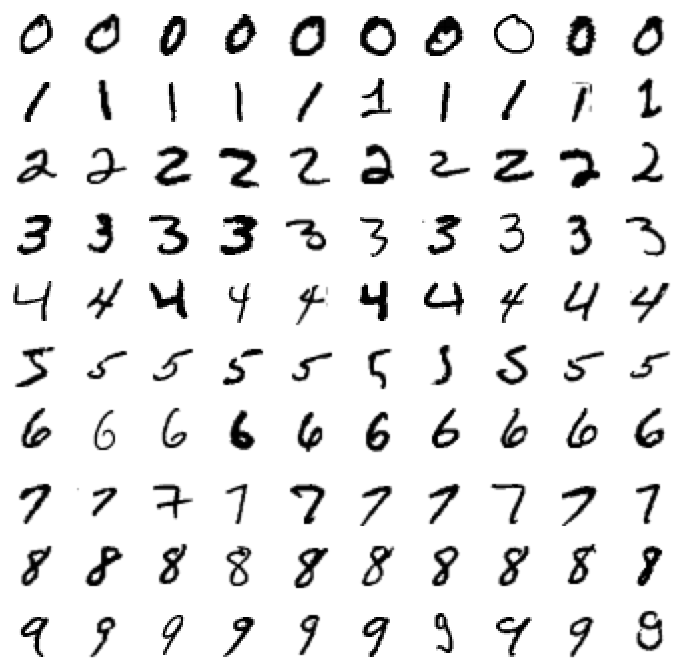

In [0]:
fig, axes = plt.subplots(nrows=10, ncols=10,figsize=(12,12))
L = [cero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve]
for j in range(0,10):
  for i in range(0,10):
    imagen = L[j][i]
    axes[j,i].axis('off') #Sirve para ocultar los ejes x e y
    axes[j,i].xaxis.set_ticklabels([]) #Sirve para ocultar los números que aparecen en el eje-x
    axes[j,i].yaxis.set_ticklabels([]) #Sirve para ocultar los números que aparecen en el eje-y
    axes[j,i].imshow(imagen,cmap=plt.cm.binary)

- Calculamos distancias entre distintos conjuntos

La distancia va a ser la mínima distancia entre dos de nuestros conjuntos.

In [0]:
imagenes_entrenamiento = imagenes_entrenamiento.reshape((60000,28*28)) 
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')/255
imagenes_test = imagenes_test.reshape((10000,28*28))
imagenes_test = imagenes_test.astype('float32')/255

In [0]:
cero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve = [],[],[],[],[],[],[],[],[],[]
n1,n2 = len(imagenes_entrenamiento),len(imagenes_test)
for i in range(0,n1):
  if etiquetas_entrenamiento[i] == 0:
    cero.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 1:
    uno.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 2:
    dos.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 3:
    tres.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 4:
    cuatro.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 5:
    cinco.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 6:
    seis.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 7:
    siete.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 8:
    ocho.append(imagenes_entrenamiento[i])
  elif etiquetas_entrenamiento[i] == 9:
    nueve.append(imagenes_entrenamiento[i])
for i in range(0,n2):
  if etiquetas_test[i] == 0:
    cero.append(imagenes_test[i])
  elif etiquetas_test[i] == 1:
    uno.append(imagenes_test[i])
  elif etiquetas_test[i] == 2:
    dos.append(imagenes_test[i])
  elif etiquetas_test[i] == 3:
    tres.append(imagenes_test[i])
  elif etiquetas_test[i] == 4:
    cuatro.append(imagenes_test[i])
  elif etiquetas_test[i] == 5:
    cinco.append(imagenes_test[i])
  elif etiquetas_test[i] == 6:
    seis.append(imagenes_test[i])
  elif etiquetas_test[i] == 7:
    siete.append(imagenes_test[i])
  elif etiquetas_test[i] == 8:
    ocho.append(imagenes_test[i])
  elif etiquetas_test[i] == 9:
    nueve.append(imagenes_test[i])

In [0]:
def distancia(L1,L2):
  a = cdist(L1,L2)
  n = len(a)
  m = min(a[0])
  for i in range(1,n):
    if min(a[i])<m:
      m = min(a[i])
  print('Distancia: ' + str(m) + '\n')

In [0]:
distancia(cero,uno)
distancia(cero,dos)
distancia(cero,tres)
distancia(cero,cuatro)
distancia(cero,cinco)
distancia(cero,seis)
distancia(cero,siete)
distancia(cero,ocho)
distancia(cero,nueve)

Distancia: 3.9605862665014393
Distancia: 5.093059405976889
Distancia: 4.995402757733053
Distancia: 5.313651737881251
Distancia: 4.762923916166512
Distancia: 4.307139363287537
Distancia: 4.880007349880525
Distancia: 4.609533279957295
Distancia: 4.465213516721245


In [0]:
distancia(uno,dos)
distancia(uno,tres)
distancia(uno,cuatro)
distancia(uno,cinco)
distancia(uno,seis)
distancia(uno,siete)
distancia(uno,ocho)
distancia(uno,nueve)

Distancia: 3.7109251106889265
Distancia: 3.7192724522879286
Distancia: 3.155859067342833
Distancia: 3.744095989835955
Distancia: 3.100232546232325
Distancia: 2.3987084979516693
Distancia: 3.227774964467744
Distancia: 3.148365152727085


In [0]:
distancia(dos,tres)
distancia(dos,cuatro)
distancia(dos,cinco)
distancia(dos,seis)
distancia(dos,siete)
distancia(dos,ocho)
distancia(dos,nueve)

Distancia: 4.2870655706589
Distancia: 5.12027284700463
Distancia: 5.501840629449808
Distancia: 4.817638697364277
Distancia: 3.6937762696437484
Distancia: 4.78098732199424
Distancia: 4.327585602324257


In [0]:
distancia(tres,cuatro)
distancia(tres,cinco)
distancia(tres,seis)
distancia(tres,siete)
distancia(tres,ocho)
distancia(tres,nueve)

Distancia: 4.482176285803043
Distancia: 3.5424465066342705
Distancia: 4.719188749044454
Distancia: 3.5953727547584946
Distancia: 4.530795176718367
Distancia: 3.4710977887147996


In [0]:
distancia(cuatro,cinco)
distancia(cuatro,seis)
distancia(cuatro,siete)
distancia(cuatro,ocho)
distancia(cuatro,nueve)

Distancia: 4.371699569655667
Distancia: 4.2783325317991325
Distancia: 3.6548030926990824
Distancia: 4.346658621538655
Distancia: 2.829639371578481


In [0]:
distancia(cinco,seis)
distancia(cinco,siete)
distancia(cinco,ocho)
distancia(cinco,nueve)

Distancia: 3.151736211701638
Distancia: 5.157219139006491
Distancia: 4.089962998168173
Distancia: 3.964420797214823


In [0]:
distancia(seis,siete)
distancia(seis,ocho)
distancia(seis,nueve)

Distancia: 5.459985611406428
Distancia: 4.660432482428058
Distancia: 4.885347563728302


In [0]:
distancia(siete,ocho)
distancia(siete,nueve)

Distancia: 4.150064735611017
Distancia: 3.130775172039739


In [0]:
distancia(ocho,nueve)

Distancia: 4.019980860469919


También, podemos calcular la distancia media entre estos conjuntos

In [0]:
def distanciaMedia(L1,L2):
  a = cdist(L1,L2)
  n = len(a)
  s = 0
  for i in range(0,n):
    s = s + sum(a[i])
  s = s/(len(L1)*len(L2))
  print('Distancia media: ' + str(s) + '\n')

In [0]:
distanciaMedia(cero,uno)
distanciaMedia(cero,dos)
distanciaMedia(cero,tres)
distanciaMedia(cero,cuatro)
distanciaMedia(cero,cinco)
distanciaMedia(cero,seis)
distanciaMedia(cero,siete)
distanciaMedia(cero,ocho)
distanciaMedia(cero,nueve)

Distancia media: 11.33022140738052

Distancia media: 11.446649721080496

Distancia media: 11.165534406717754

Distancia media: 11.338305602124938

Distancia media: 10.798886635480184

Distancia media: 11.105303296761342

Distancia media: 11.251211850383909

Distancia media: 11.216272992107857

Distancia media: 11.19416775238512



In [0]:
distanciaMedia(uno,dos)
distanciaMedia(uno,tres)
distanciaMedia(uno,cuatro)
distanciaMedia(uno,cinco)
distanciaMedia(uno,seis)
distanciaMedia(uno,siete)
distanciaMedia(uno,ocho)
distanciaMedia(uno,nueve)

Distancia media: 9.86338828511574

Distancia media: 9.612826070517785

Distancia media: 9.686546379244898

Distancia media: 9.602254242954627

Distancia media: 9.84558218362506

Distancia media: 9.331906697089376

Distancia media: 9.454305355406701

Distancia media: 9.3823851828761



In [0]:
distanciaMedia(dos,tres)
distanciaMedia(dos,cuatro)
distanciaMedia(dos,cinco)
distanciaMedia(dos,seis)
distanciaMedia(dos,siete)
distanciaMedia(dos,ocho)
distanciaMedia(dos,nueve)

Distancia media: 10.656442784396955

Distancia media: 10.62953845945269

Distancia media: 10.854864955449179

Distancia media: 10.434747631918265

Distancia media: 10.743259060204934

Distancia media: 10.486209118398522

Distancia media: 10.61670967076106



In [0]:
distanciaMedia(tres,cuatro)
distanciaMedia(tres,cinco)
distanciaMedia(tres,seis)
distanciaMedia(tres,siete)
distanciaMedia(tres,ocho)
distanciaMedia(tres,nueve)

Distancia media: 10.596282655222408

Distancia media: 10.041298989266199

Distancia media: 10.766873528906821

Distancia media: 10.413195148052031

Distancia media: 10.115107686844462

Distancia media: 10.251553073100146



In [0]:
distanciaMedia(cuatro,cinco)
distanciaMedia(cuatro,seis)
distanciaMedia(cuatro,siete)
distanciaMedia(cuatro,ocho)
distanciaMedia(cuatro,nueve)

Distancia media: 10.214854905448808

Distancia media: 10.0768259993256

Distancia media: 9.649313257025714

Distancia media: 10.199433479505528

Distancia media: 9.156192311196284



In [0]:
distanciaMedia(cinco,seis)
distanciaMedia(cinco,siete)
distanciaMedia(cinco,ocho)
distanciaMedia(cinco,nueve)

Distancia media: 10.42877206790452

Distancia media: 10.190126512481628

Distancia media: 10.076234350061497

Distancia media: 9.952928665061906



In [0]:
distanciaMedia(seis,siete)
distanciaMedia(seis,ocho)
distanciaMedia(seis,nueve)

Distancia media: 10.577032422461404

Distancia media: 10.472622603240064

Distancia media: 10.155603690403588



In [0]:
distanciaMedia(siete,ocho)
distanciaMedia(siete,nueve)

Distancia media: 10.229219615659662

Distancia media: 9.126008775004582



In [0]:
distanciaMedia(ocho,nueve)

Distancia media: 9.870597115739393



Por último calculamos la distancia máxima

In [0]:
def distanciaMaxima(L1,L2):
  a = cdist(L1,L2)
  n = len(a)
  m = max(a[0])
  for i in range(1,n):
    if max(a[i])>m:
      m = max(a[i])
  print('Distancia máxima: ' + str(m) + '\n')

In [0]:
distanciaMaxima(cero,uno)
distanciaMaxima(cero,dos)
distanciaMaxima(cero,tres)
distanciaMaxima(cero,cuatro)
distanciaMaxima(cero,cinco)
distanciaMaxima(cero,seis)
distanciaMaxima(cero,siete)
distanciaMaxima(cero,ocho)
distanciaMaxima(cero,nueve)

Distancia máxima: 16.48665885703234

Distancia máxima: 16.01593307196389

Distancia máxima: 16.195154058134793

Distancia máxima: 16.148902018603813

Distancia máxima: 16.248527838108114

Distancia máxima: 16.875761988934034

Distancia máxima: 16.38814148511861

Distancia máxima: 15.963905387308856

Distancia máxima: 16.148831546640125



In [0]:
distanciaMaxima(uno,dos)
distanciaMaxima(uno,tres)
distanciaMaxima(uno,cuatro)
distanciaMaxima(uno,cinco)
distanciaMaxima(uno,seis)
distanciaMaxima(uno,siete)
distanciaMaxima(uno,ocho)
distanciaMaxima(uno,nueve)

Distancia máxima: 15.30838905089494

Distancia máxima: 15.524931523329357

Distancia máxima: 15.905973720586866

Distancia máxima: 15.193162564607485

Distancia máxima: 15.35550127734305

Distancia máxima: 15.221074984210805

Distancia máxima: 15.544705819959047

Distancia máxima: 15.191325276417048



In [0]:
distanciaMaxima(dos,tres)
distanciaMaxima(dos,cuatro)
distanciaMaxima(dos,cinco)
distanciaMaxima(dos,seis)
distanciaMaxima(dos,siete)
distanciaMaxima(dos,ocho)
distanciaMaxima(dos,nueve)

Distancia máxima: 15.971441786062455

Distancia máxima: 16.066338839312415

Distancia máxima: 15.981644191173471

Distancia máxima: 15.46740647345663

Distancia máxima: 16.223690127414564

Distancia máxima: 15.434949906071871

Distancia máxima: 16.208130205992056



In [0]:
distanciaMaxima(tres,cuatro)
distanciaMaxima(tres,cinco)
distanciaMaxima(tres,seis)
distanciaMaxima(tres,siete)
distanciaMaxima(tres,ocho)
distanciaMaxima(tres,nueve)

Distancia máxima: 15.971592922620685

Distancia máxima: 15.75711850096368

Distancia máxima: 15.783742796678256

Distancia máxima: 15.317374529469644

Distancia máxima: 15.490361411372977

Distancia máxima: 16.299512133474643



In [0]:
distanciaMaxima(cuatro,cinco)
distanciaMaxima(cuatro,seis)
distanciaMaxima(cuatro,siete)
distanciaMaxima(cuatro,ocho)
distanciaMaxima(cuatro,nueve)

Distancia máxima: 16.112051922031846

Distancia máxima: 15.855009640023312

Distancia máxima: 15.583338244707342

Distancia máxima: 15.79886507485288

Distancia máxima: 15.333223517903765



In [0]:
distanciaMaxima(cinco,seis)
distanciaMaxima(cinco,siete)
distanciaMaxima(cinco,ocho)
distanciaMaxima(cinco,nueve)

Distancia máxima: 16.14804539555916

Distancia máxima: 15.782202787461738

Distancia máxima: 15.896432911808283

Distancia máxima: 15.956718202456356



In [0]:
distanciaMaxima(seis,siete)
distanciaMaxima(seis,ocho)
distanciaMaxima(seis,nueve)

Distancia máxima: 15.284032382054246

Distancia máxima: 15.880807037302125

Distancia máxima: 15.151133562220215



In [0]:
distanciaMaxima(siete,ocho)
distanciaMaxima(siete,nueve)

Distancia máxima: 15.939977802745238

Distancia máxima: 15.105173281201555



In [0]:
distanciaMaxima(ocho,nueve)

Distancia máxima: 15.756412348882275



También podemos calcular el diámetro de nuestros conjuntos o la distancia media que hay entre sus elementos

In [0]:
distanciaMaxima(cero,cero)
distanciaMaxima(uno,uno)
distanciaMaxima(dos,dos)
distanciaMaxima(tres,tres)
distanciaMaxima(cuatro,cuatro)
distanciaMaxima(cinco,cinco)
distanciaMaxima(seis,seis)
distanciaMaxima(siete,siete)
distanciaMaxima(ocho,ocho)
distanciaMaxima(nueve,nueve)

Distancia máxima: 16.185287697205844

Distancia máxima: 13.944733056319404

Distancia máxima: 15.59521463843083

Distancia máxima: 15.487448796610122

Distancia máxima: 15.21630836385664

Distancia máxima: 15.60140871565858

Distancia máxima: 15.024927150878458

Distancia máxima: 14.671483440482843

Distancia máxima: 15.135778685303649

Distancia máxima: 15.019339085843106



In [0]:
distanciaMedia(cero,cero)
distanciaMedia(uno,uno)
distanciaMedia(dos,dos)
distanciaMedia(tres,tres)
distanciaMedia(cuatro,cuatro)
distanciaMedia(cinco,cinco)
distanciaMedia(seis,seis)
distanciaMedia(siete,siete)
distanciaMedia(ocho,ocho)
distanciaMedia(nueve,nueve)

Distancia media: 9.856987510508814

Distancia media: 6.458878443909645

Distancia media: 9.986981362223657

Distancia media: 9.364503950162705

Distancia media: 8.940572588320727

Distancia media: 9.64708147512997

Distancia media: 9.173573132029103

Distancia media: 8.515634997564522

Distancia media: 9.450256211907737

Distancia media: 8.637181063384347



**Un resúmen de todas las distancias:**

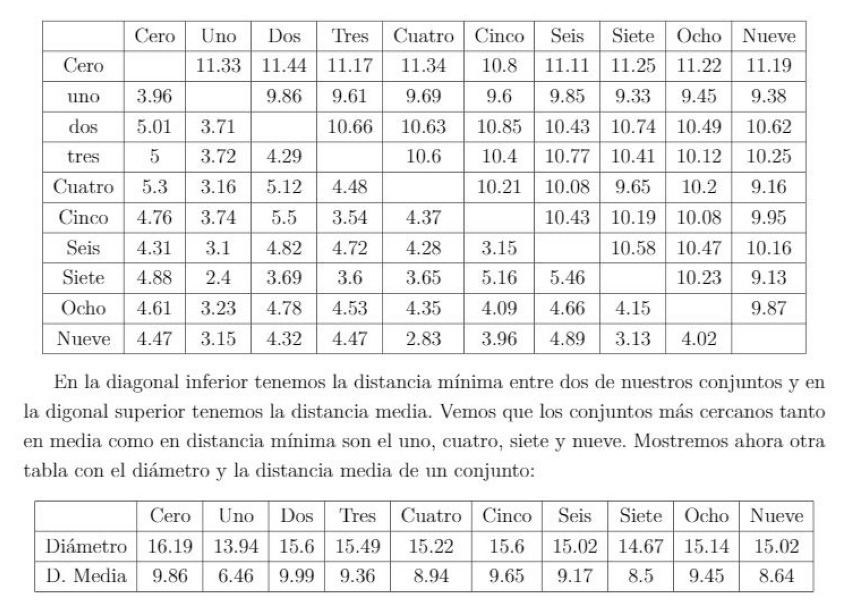

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,15))
axes.axis('off') 
axes.xaxis.set_ticklabels([]) 
axes.yaxis.set_ticklabels([])
imagen = cv2.imread('distancias.JPG')
mostrarImagen(imagen)

**Vamos que la distancia media entre elementos de un mismo conjunto es más pequeña que la distancia media entre elementos de distintos conjuntos (como norma general).**

- Ahora vamos a reducir la dimensión de los puntos para poder mostrarlos en 2D (solo utilizamos el conjunto de test)

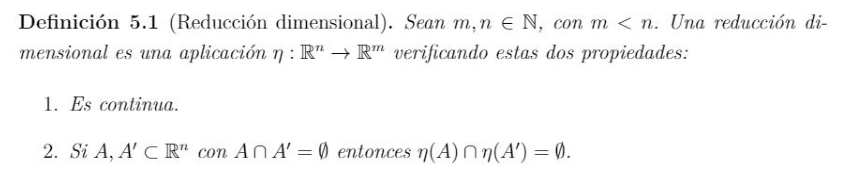

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,15))
axes.axis('off') 
axes.xaxis.set_ticklabels([]) 
axes.yaxis.set_ticklabels([])
imagen = cv2.imread('Reducción.JPG')
mostrarImagen(imagen)

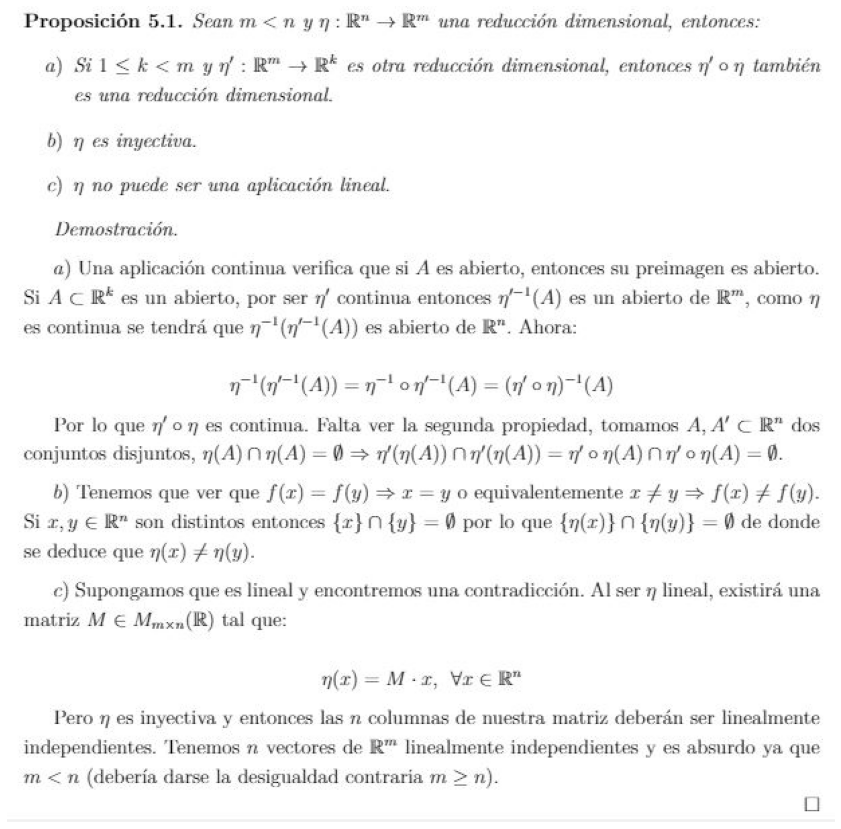

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,15))
axes.axis('off') 
axes.xaxis.set_ticklabels([]) 
axes.yaxis.set_ticklabels([])
imagen = cv2.imread('Proposición.JPG')
mostrarImagen(imagen)

- De la propiedad a) se deduce que los algoritmos van reduciendo la dimensión poco a poco. 

- Si pudiésemos construir reducciones dimensionales lineales sería fácil preservar las distancias:

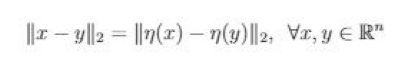

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(7,7))
axes.axis('off') 
axes.xaxis.set_ticklabels([]) 
axes.yaxis.set_ticklabels([])
imagen = cv2.imread('dist.JPG')
mostrarImagen(imagen)

- Como no pueden ser lineales es bastante complicado "preservar" la forma y las distancias.

In [0]:
Numeros = []
y = []
n0,n1,n2,n3,n4,n5,n6,n7,n8,n9 = len(cero),len(uno),len(dos),len(tres),len(cuatro),len(cinco),len(seis),len(siete),len(ocho),len(nueve)
for i in range(0,n0):
  Numeros.append(cero[i])
  y.append(0)
for i in range(0,n1):
  Numeros.append(uno[i])
  y.append(1)
for i in range(0,n2):
  Numeros.append(dos[i])
  y.append(2)
for i in range(0,n3):
  Numeros.append(tres[i])
  y.append(3)
for i in range(0,n4):
  Numeros.append(cuatro[i])
  y.append(4)
for i in range(0,n5):
  Numeros.append(cinco[i])
  y.append(5)
for i in range(0,n6):
  Numeros.append(seis[i])
  y.append(6)
for i in range(0,n7):
  Numeros.append(siete[i])
  y.append(7)
for i in range(0,n8):
  Numeros.append(ocho[i])
  y.append(8)
for i in range(0,n9):
  Numeros.append(nueve[i])
  y.append(9)
Numeros = np.array(Numeros)
y = np.array(y)

In [0]:
def plot_embedding(X,y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[2., 2.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [0]:
X_embedded = manifold.TSNE(n_components=2, init='pca', random_state=0).fit_transform(imagenes_test)

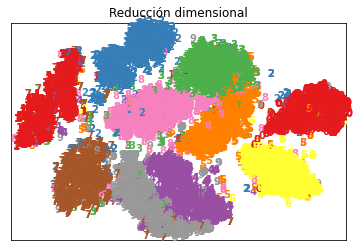

In [0]:
plot_embedding(X_embedded,etiquetas_test, "Reducción dimensional")

**De esta foto deducimos que las fotos viven en zonas diferenciadas. Por lo que el modelo de predicción esta aprendiendo a diferenciar zonas en el espacio 784-dimensional.**

- Por último, entrenamos un modelo

In [0]:
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_test = to_categorical(etiquetas_test)

In [0]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer=optimizers.SGD(learning_rate=0.2),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = network.fit(imagenes_entrenamiento,etiquetas_entrenamiento,validation_data=(imagenes_test,etiquetas_test),epochs=10,batch_size=60000) #epoch = 2000

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0840 - accuracy: 0.9780 - val_loss: 0.1005 - val_accuracy: 0.9715
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0840 - accuracy: 0.9781 - val_loss: 0.1005 - val_accuracy: 0.9716
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0840 - accuracy: 0.9781 - val_loss: 0.1004 - val_accuracy: 0.9716
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0839 - accuracy: 0.9781 - val_loss: 0.1004 - val_accuracy: 0.9716
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0839 - accuracy: 0.9781 - val_loss: 0.1004 - val_accuracy: 0.9716
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0839 - accuracy: 0.9781 - val_loss: 0.1004 - val_accuracy: 0.9716
Epoch 7/10
60000/60000 [==============================] - 2s 34us/st

In [0]:
test_loss,test_acc = network.evaluate(imagenes_test,etiquetas_test)
print('test_acc:', test_acc)
print('test_loss:',test_loss)

10000/10000 [==============================] - 1s 61us/step
test_acc: 0.9714999794960022
test_loss: 0.10025303014218807


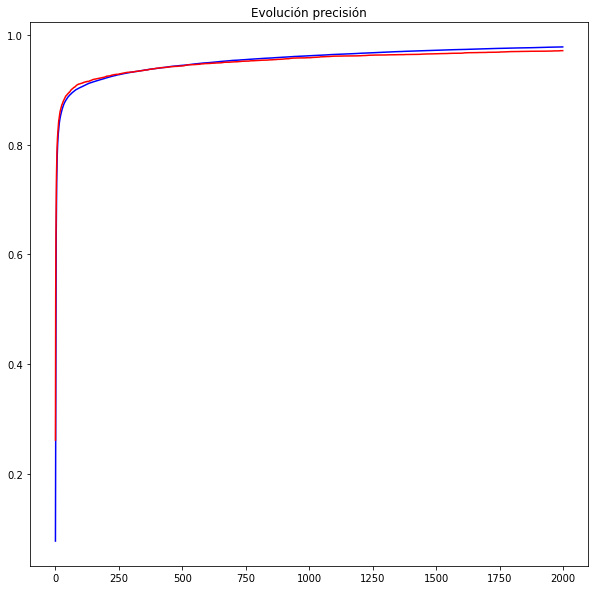

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')
plt.title('Evolución precisión')

plt.show()

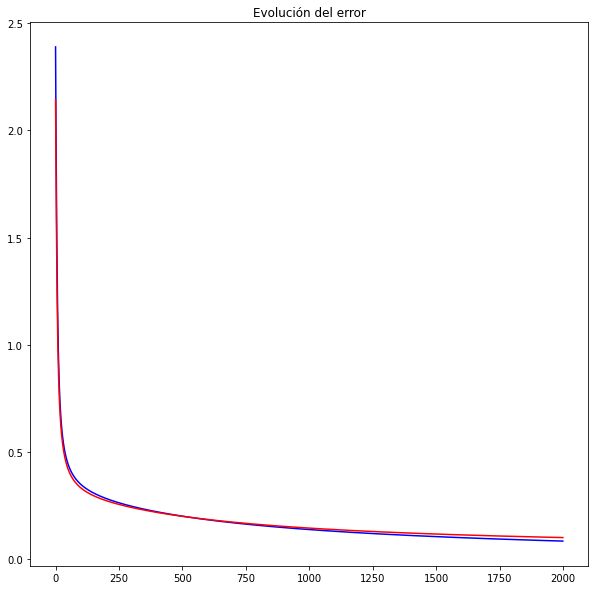

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')
plt.title('Evolución del error')

plt.show()

In [0]:
def maximo(v):
  m = v[0]
  k = 0
  for i in range(1,10):
    if v[i]>m:
      m = v[i]
      k = i
  return k

In [0]:
n = len(etiquetas_test)
pred = network.predict(imagenes_test)
predicciones = []
etiquetas = []
for i in range(0,n):
  predicciones.append(maximo(pred[i]))
  etiquetas.append(maximo(etiquetas_test[i]))

In [0]:
aciertos = 0
fallos = []
for i in range(0,10000):
  if predicciones[i] == etiquetas[i]:
    aciertos = aciertos + 1
  else:
    fallos.append('Ha confundido el ' + str(predicciones[i]) + ' con el ' + str(etiquetas[i]))

print(str(aciertos/100) + '%')


97.15%


In [0]:
len(fallos)

285

In [0]:
print(fallos)

['Ha confundido el 6 con el 5', 'Ha confundido el 2 con el 4', 'Ha confundido el 0 con el 6', 'Ha confundido el 7 con el 9', 'Ha confundido el 7 con el 2', 'Ha confundido el 3 con el 5', 'Ha confundido el 7 con el 3', 'Ha confundido el 0 con el 6', 'Ha confundido el 2 con el 8', 'Ha confundido el 3 con el 8', 'Ha confundido el 2 con el 4', 'Ha confundido el 8 con el 1', 'Ha confundido el 8 con el 2', 'Ha confundido el 3 con el 7', 'Ha confundido el 4 con el 8', 'Ha confundido el 9 con el 4', 'Ha confundido el 6 con el 0', 'Ha confundido el 8 con el 5', 'Ha confundido el 9 con el 4', 'Ha confundido el 9 con el 4', 'Ha confundido el 7 con el 8', 'Ha confundido el 7 con el 9', 'Ha confundido el 9 con el 8', 'Ha confundido el 4 con el 5', 'Ha confundido el 0 con el 6', 'Ha confundido el 5 con el 6', 'Ha confundido el 8 con el 5', 'Ha confundido el 1 con el 7', 'Ha confundido el 2 con el 6', 'Ha confundido el 6 con el 4', 'Ha confundido el 1 con el 6', 'Ha confundido el 8 con el 6', 'Ha con

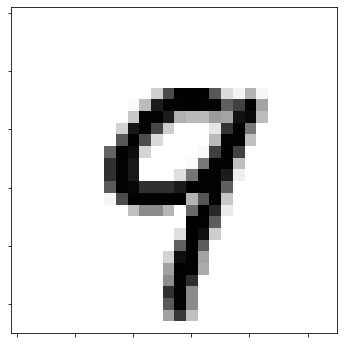

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
imagen = imagenes_test[12]
axes.xaxis.set_ticklabels([]) #Sirve para ocultar los números que aparecen en el eje-x
axes.yaxis.set_ticklabels([]) #Sirve para ocultar los números que aparecen en el eje-y
axes.imshow(imagen,cmap=plt.cm.binary)